## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

# Pengaplikasian Python dalam Data Analysis

## Tujuan

Setelah menyelesaikan lab ini, kamu akan mampu untuk:
*   Mengunggah dataset dengan `file.upload` dan mengunduh dataset dengan `file.download`
*   Pengelolaan data `date`
*   Penggunaan fungsi `pivot_table` & `groupby`
*   Membuat dan menggunakan fungsi sederhana pada `DataFrame`
*   Membuat visualisasi secara sederhana dengan menggunakan `plot`
*   Menjalankan SQL di Colab dengan `sqlite3`

In [ ]:
#1
#Mengimpor Libraries
import pandas as pd
import numpy as np
from google.colab import files #unggah dan unduh file
import io #membaca data

In [ ]:
#2
#Mengimpor dataset
URL = 'https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/tokopaedi.csv'
df = pd.read_csv(URL)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Mengunggah dan Menggunduh Dataset

In [ ]:
#3
#Mengunggah dataset dengan upload file
unggah = files.upload()

In [ ]:
#4
#Membaca dataset
df_unggah = pd.read_csv('df_unggah (2).csv')
df_unggah

FileNotFoundError: [Errno 2] No such file or directory: 'df_unggah (2).csv'

In [ ]:
#5
#Mengunduh dataset
df_unggah.to_csv('df_unggah.csv')
files.download('df_unggah.csv')

In [ ]:
#6
#Menampilkan gambaran data
df.info()

## Pengelolaan Data `Date`

In [ ]:
#7
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['ship_date']= pd.to_datetime(df['ship_date'])
df.dtypes

,0
row_id,int64
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object


In [ ]:
#8
#Membuat kolom tambahan untuk day, month, month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df['year']=df['order_date'].dt.year
df['ship_delay'] = df['ship_date']-df['order_date']
df['ship_delay'] = df['ship_delay'].dt.days
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,day,month,month_num,year,ship_delay
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Tuesday,November,11,2016,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Tuesday,November,11,2016,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Sunday,June,6,2016,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sunday,October,10,2015,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Sunday,October,10,2015,7


In [ ]:
#9
#Latihan: Filter berdasarkan bulan October tahun 2015


##Penggunaan fungsi `pivot_table` & `groupby`

### `pivot_table`

**Formula:**

nama_variable  =  `pd.pivot_table`(nama_dataframe`, values=`['kolom_nilai']`,index=`['baris']`,columns=`['header']`,aggfunc=np.`jenis_agregasi)

Output: `DataFrame`

In [ ]:
#10
df_pivot = pd.pivot_table(df,values=['quantity'],index=['region'],columns=['category'],aggfunc=np.average)
df_pivot

quantity                           
category Furniture Office Supplies Technology
region                                       
Central   3.798337        3.803797   3.676190
East      3.683860        3.774533   3.629907
South     3.888554        3.819095   3.815700
West      3.813296        3.813917   3.898164

In [ ]:
#11
#Buatlah tabel pivot untuk: index = country, header/kolom = city, nilainya = penjumlahan dari profit


### `groupby`

**Formula:**

nama variabel = nama_dataframe`.groupby(by=`['kolom_1'  ,   'kolom_2'])['kolom_agregasi']`.`jenis_agregasi()

Output: `series`


In [ ]:
#12
df_groupby = df.groupby(by=["month_num","month"])["profit"].sum()
df_groupby

,,profit
month_num,month,
1,January,9134.4461
2,February,10294.6107
3,March,28594.6872
4,April,11587.4363
5,May,22411.3078
6,June,21285.7954
7,July,13832.6648
8,August,21776.9384
9,September,36857.4753


In [ ]:
#13
#merubah output groupby menjadi DataFrame dengan as_index = False
df_groupby = df.groupby(by=["month_num","month"], as_index=False)["profit"].sum()
df_groupby

,month_num,month,profit
0,1,January,9134.4461
1,2,February,10294.6107
2,3,March,28594.6872
3,4,April,11587.4363
4,5,May,22411.3078
5,6,June,21285.7954
6,7,July,13832.6648
7,8,August,21776.9384
8,9,September,36857.4753
9,10,October,31784.0413


In [ ]:
#14
#Buatlah dengan fungsi groupby, top 5 city penghasil profit paling besar.


##Membuat dan menggunakan fungsi sederhana pada DataFrame

Formula:

`def` nama_fungsi `(`nilai`):`

    kondisi



In [ ]:
#15
#Membuat suatu fungsi
def condition(value):
    if value > 2:
      return 'High'
    elif value == 2:
      return 'Medium'
    else:
        return 'Low'

In [ ]:
#16
#Pengaplikasian fungsi
df['status'] = df['quantity'].apply(condition)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,sales,quantity,discount,profit,day,month,month_num,year,ship_delay,status
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,Tuesday,November,11,2016,3,Medium
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,Tuesday,November,11,2016,3,High
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,Sunday,June,6,2016,4,Medium
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,Sunday,October,10,2015,7,High
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,Sunday,October,10,2015,7,Medium


In [ ]:
#17
#Buatlah suatu kolom baru yang bernama ship_status yang dapat menyatakan bahwa apabila waktu pengiriman <= 4 hari dari tanggal order maka 'Good' selain itu maka 'Bad'


## Membuat visualisasi secara sederhana dengan menggunakan `plot`

<Axes: title={'center': 'Monthly Total Quantity'}, xlabel='Month', ylabel='Total Profit'>

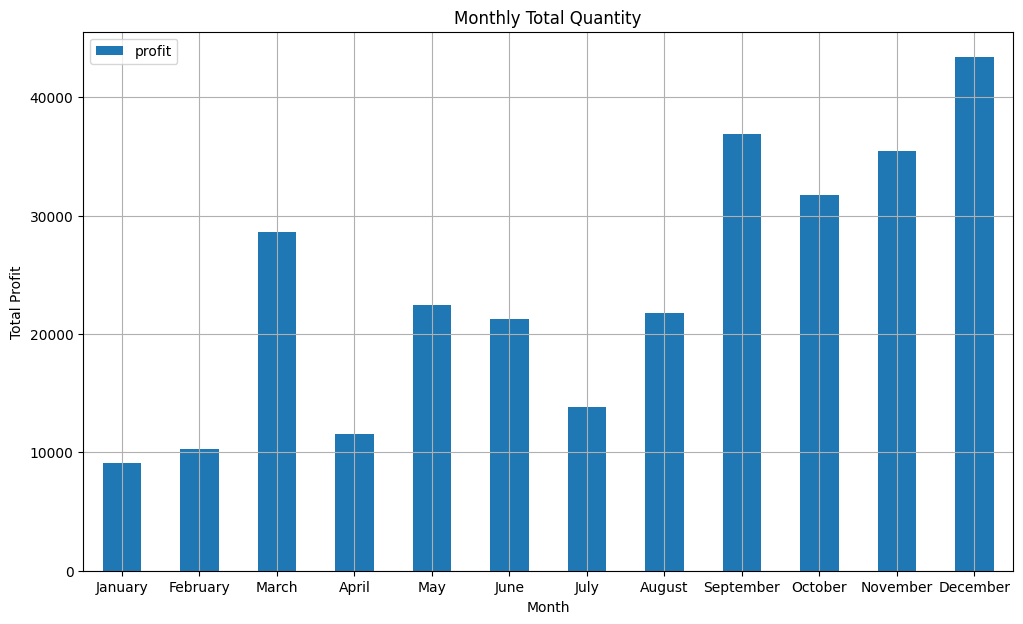

In [ ]:
#18
#Membuat grafik
df_groupby.plot(x='month',
           y=['profit'],
           kind='bar',
           grid = True,
           xlabel = 'Month',
           ylabel = 'Total Profit',
           figsize=(12,7),
           rot = 0, #Rotasi
           title = 'Monthly Total Quantity',
           table = False,
           secondary_y = False)

## Menjalankan SQL di Colab dengan `sqlite3`

In [ ]:
#19
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df.to_sql('tokopaedi',conn, index=False, if_exists='replace')

9994

In [ ]:
#20
#Query SQL
df_sql = pd.read_sql("""
SELECT
    tokopaedi.city,
    sum(tokopaedi.profit) profit
from
    tokopaedi
group by
    1
order by
    2 desc
limit 10
""", conn)
df_sql

,city,profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


In [ ]:
#21
#Buat top 5 city berdasarkan sales pada bulan November 2016 dengan menggunakan sql


#Minitask

Tampilkan TOP 5 City selama 2016 dengan berdasarkan nilai profit yang paling tinggi. Tampilkan juga dengan bar diagram.

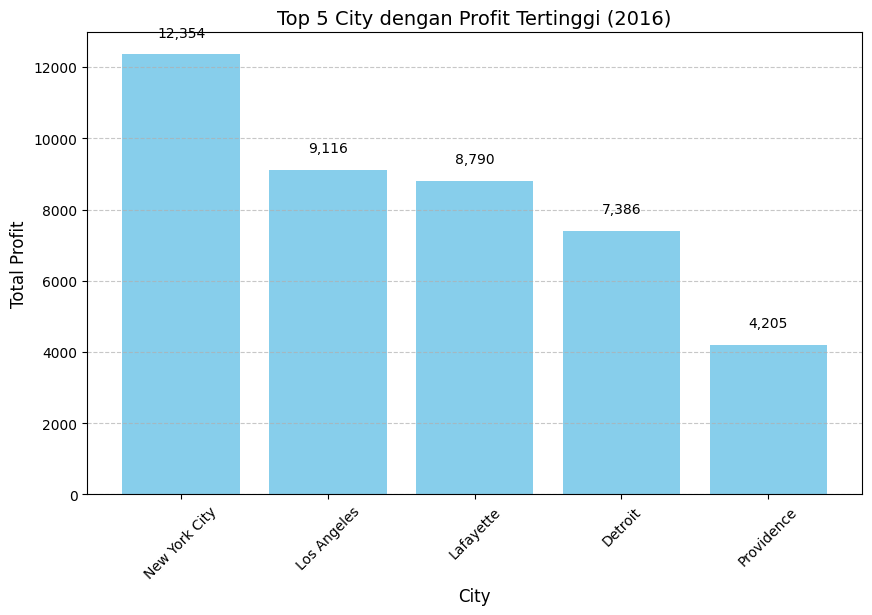

In [ ]:
import matplotlib.pyplot as plt

# Filter data untuk tahun 2016
df_2016 = df[df['order_date'].dt.year == 2016]

# Group by City dan menghitung total profit per kota
top_cities = df_2016.groupby('city')['profit'].sum().reset_index()

# Mengambil 5 kota dengan profit tertinggi
top_cities = top_cities.sort_values(by='profit', ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_cities['city'], top_cities['profit'], color='skyblue')

# Menambahkan judul dan label
plt.title('Top 5 City dengan Profit Tertinggi (2016)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)

# Menampilkan nilai profit di atas setiap bar
for i, profit in enumerate(top_cities['profit']):
    plt.text(i, profit + 500, f'{profit:,.0f}', ha='center', fontsize=10)

plt.xticks(rotation=45)  # Memiringkan label kota agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

Berikut contoh pengerjaan data yang lain: https://drive.google.com/drive/folders/19sYNJ2HYmnDyho0pmOgsVh8zV8FvZtRT?usp=sharing
